In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan_prediction_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [4]:
print(df.columns)
print("------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------")
print(df.shape)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
------------------------------------------------------
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
------------------------------------------------------
(614, 12)


In [5]:
def detail_info(data):
    temp_df = pd.DataFrame(index= data.columns)
    
    temp_df['data_type'] = data.dtypes
    temp_df['unique_val'] = data.nunique()
    temp_df['duplicate_val'] = data.duplicated().sum()
    temp_df['missing_val'] = data.isnull().sum()
    temp_df['missing_val_%'] = round(data.isnull().mean()*100,2)
    
    return temp_df

detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
Gender,object,2,0,13,2.12
Married,object,2,0,3,0.49
Dependents,object,4,0,15,2.44
Education,object,2,0,0,0.00
Self_Employed,object,2,0,32,5.21
ApplicantIncome,int64,505,0,0,0.00
CoapplicantIncome,float64,287,0,0,0.00
LoanAmount,float64,203,0,22,3.58
Loan_Amount_Term,float64,10,0,14,2.28
Credit_History,float64,2,0,50,8.14


In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [7]:
for feature in df[categorical_features]:
    print(f"Feature:  {feature} \n")
    print(df[feature].value_counts(dropna=False))
    print("----------------------------------------------")

Feature:  Gender 

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
----------------------------------------------
Feature:  Married 

Yes    398
No     213
NaN      3
Name: Married, dtype: int64
----------------------------------------------
Feature:  Dependents 

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
----------------------------------------------
Feature:  Education 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------------
Feature:  Self_Employed 

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
----------------------------------------------
Feature:  Property_Area 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
----------------------------------------------
Feature:  Loan_Status 

Y    422
N    192
Name: Loan_Status, dtype: int64
----------------------------------------------


In [8]:
# For categorical_features, using mode to impute missing values:

for feature in categorical_features:
    if df[feature].isnull().sum() > 0:  
        print(f"{feature} has missing values")
        mode_value = df[feature].mode()[0]
        df[feature].fillna(mode_value, inplace=True)


Gender has missing values
Married has missing values
Dependents has missing values
Self_Employed has missing values


In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

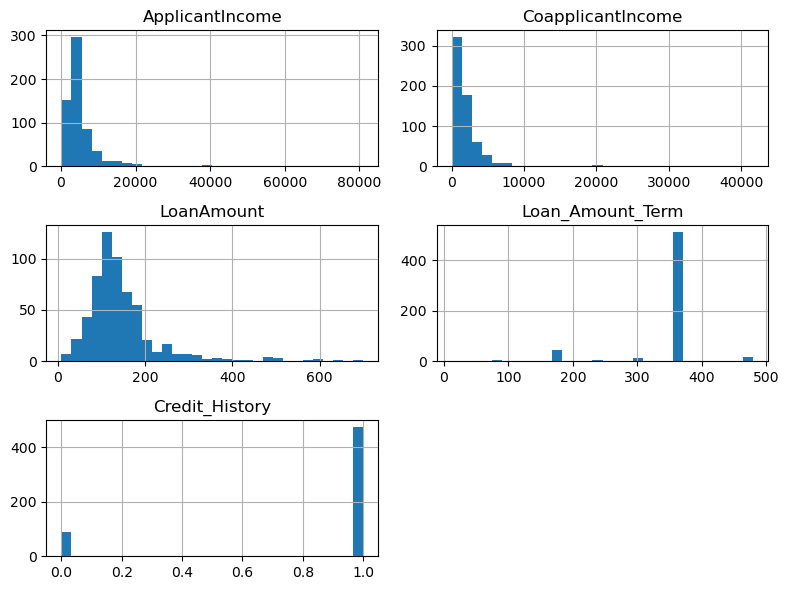

In [10]:
df.hist(figsize=(8,6), bins=30)
plt.tight_layout() 
plt.show()

In [11]:
# USing KNNImputer to Impute missing values of numerical features:

from sklearn.impute import KNNImputer

for feature in numerical_features:
    if df[feature].isnull().sum() > 0:
        print(f"{feature} has missing values")
        
        if feature == "Credit_History":   # Credit_History is a categorical feature of values 0 and 1
            mode_value = df["Credit_History"].mode()[0]
            df[feature].fillna(mode_value, inplace=True)
            df[feature]=df[feature].astype(int)
        else:            
            imputer = KNNImputer(n_neighbors=5)
            imputed_values = imputer.fit_transform(df[[feature]])
            df[feature].fillna(pd.Series(imputed_values.squeeze()), inplace=True)


LoanAmount has missing values
Loan_Amount_Term has missing values
Credit_History has missing values


In [12]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
Gender,object,2,0,0,0.0
Married,object,2,0,0,0.0
Dependents,object,4,0,0,0.0
Education,object,2,0,0,0.0
Self_Employed,object,2,0,0,0.0
ApplicantIncome,int64,505,0,0,0.0
CoapplicantIncome,float64,287,0,0,0.0
LoanAmount,float64,204,0,0,0.0
Loan_Amount_Term,float64,11,0,0,0.0
Credit_History,int32,2,0,0,0.0


In [13]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df["Dependents"].replace("3+", "3", inplace=True)
df["Dependents"] = df["Dependents"].astype(int)
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [16]:
# Encoding the output feature

def feature_encoding(df, col):
    temp_list = list(sorted(df[col].unique()))
    return dict(zip(temp_list, range(len(temp_list))))  

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [18]:
# Features listed below are the categorical features and require encoding to be done:

cat_features = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area', 'Loan_Status']

In [19]:
transformed_dict = {} 

for feature in df[cat_features]:
    feature_dict = feature_encoding(df, feature)
    transformed_dict[feature] = feature_dict

    df[feature] = df[feature].map(feature_dict)

transformed_dict
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [20]:
import os
import pickle

directory = "loan_model_feature_dictionaries"

if not os.path.exists(directory):
    os.makedirs(directory)

for feature, feature_dict in transformed_dict.items():
    file_path = os.path.join(directory, f"{feature}_dict.pkl")
    with open(file_path, "wb") as file:
        pickle.dump(feature_dict, file)

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score

In [22]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['Loan_Status'])

In [23]:
models = []

models.append(('LogisticReg',LogisticRegression()))
models.append(('KNeighborsClf',KNeighborsClassifier()))
models.append(('DecisionTreeClf',DecisionTreeClassifier()))
models.append(('RandomForestClf',RandomForestClassifier()))

In [24]:
metrics = pd.DataFrame(index=['Train_Accuracy', 'Test_Accuracy','CV_Accuracy',],
                       columns=['LogisticReg','KNeighborsClf', 'DecisionTreeClf', 'RandomForestClf'])
metrics

,LogisticReg,KNeighborsClf,DecisionTreeClf,RandomForestClf
Train_Accuracy,NaN,NaN,NaN,NaN
Test_Accuracy,NaN,NaN,NaN,NaN
CV_Accuracy,NaN,NaN,NaN,NaN


In [25]:
for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    metrics.loc['Train_Accuracy', name] = round(train_accuracy*100,2)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    metrics.loc['Test_Accuracy', name] = round(test_accuracy*100,2)

    cv_result = cross_val_score(model, X_train, y_train, cv = 3, scoring ='accuracy')
    print(f"{name:{13}} {cv_result} {cv_result.mean():{18}} {cv_result.std():{18}}")
    metrics.loc['CV_Accuracy', name] = round(cv_result.mean()*100,2)
    
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix for", name)
    print(confusion_matrix(y_test, y_test_pred))  
    print("-----------------------------------------------")

display(metrics)

LogisticReg   [0.80487805 0.81097561 0.76687117] 0.7942416080602523 0.019513258757433094
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Confusion Matrix for LogisticReg
[[22 16]
 [ 1 84]]
-----------------------------------------------
KNeighborsClf [0.6402439  0.54878049 0.62576687] 0.6049304204698488 0.04014147740457638
              precision    recall  f1-score   support

           0       0.41      0.29      0.34        38
           1       0.72      0.81      0.76        85

    accuracy                           0.65       123
   macro avg       0.56      0.55      0.55       123
weighted avg       0.62      0.65      0.63       123

Confusion Matrix for KNeighborsClf
[[11 27]
 [16 69]]
---------------

,LogisticReg,KNeighborsClf,DecisionTreeClf,RandomForestClf
Train_Accuracy,79.84,71.49,100.0,100.0
Test_Accuracy,86.18,65.04,72.36,82.93
CV_Accuracy,79.42,60.49,69.45,78.61


In [26]:
param_grid = {'criterion' : ['gini', 'entropy'],
        'n_estimators' : [10,100,200,300],
        'max_depth' : [4,5,6],
        'max_features':  [8,9,10],
        'min_samples_leaf': [2,3,4,5],
        'n_jobs': [-1],
        'random_state': [42]
        }

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 10,
 'min_samples_leaf': 5,
 'n_estimators': 10,
 'n_jobs': -1,
 'random_state': 42}

In [27]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8455284552845529

In [28]:
confusion_matrix(y_test, y_pred)

array([[22, 16],
       [ 3, 82]], dtype=int64)

In [29]:
file_path = os.path.join(directory, "model.pkl")
with open(file_path, "wb") as file:
    pickle.dump(best_model, file)